# Case Study - Young People - Survay Anomaly Detection
## Learning goals: 
 - Data Preprocessing: Outlier Detection
 
 For this lab, we will work on a survey dataset conducted in Slovaki.
 To access the data on Kaggle.com use this link: https://www.kaggle.com/miroslavsabo/young-people-survey
 

### Import Required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
att_df = pd.read_csv('columns.csv')
att_df.set_index('short', inplace=True)
att_df

,original
short,
Music,I enjoy listening to music.
Slow songs or fast songs,I prefer.
Dance,"Dance, Disco, Funk"
Folk,Folk music
Country,Country
...,...
Left - right handed,I am
Education,Highest education achieved
Only child,I am the only child


In [3]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


### Two dimensional outlier detection (both numeric)
Find the outliers in the respondants based on the two columns: Height, Weight.

In [4]:
w_df = response_df[['Height', 'Weight']]
w_df


,Height,Weight
0,163.0,48.0
1,163.0,58.0
2,176.0,67.0
3,172.0,59.0
4,170.0,59.0
...,...,...
1005,164.0,57.0
1006,183.0,80.0
1007,173.0,75.0
1008,173.0,58.0


In [5]:
w_df.describe()

,Height,Weight
count,990.000000,990.000000
mean,173.514141,66.405051
std,10.024505,13.839561
min,62.000000,41.000000
25%,167.000000,55.000000
50%,173.000000,64.000000
75%,180.000000,75.000000
max,203.000000,165.000000


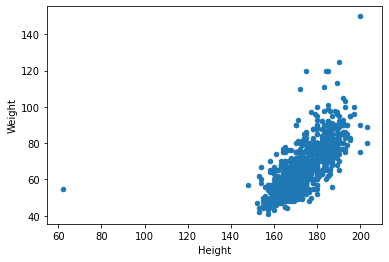

In [6]:
w_df.plot(kind='scatter', x='Height', y='Weight')

### Calculate Body Mass Index (BMI)
BMI is a calculated measure from Height and weight of individuals that shows the fitness and healthiness of individuals. BMIs smaller than 19 is considered thin, and BMI higher that 25 are considered overweight.

In [7]:
# Calculate BMI
w_df = w_df.fillna(w_df.median())
response_df['BMI'] = w_df.apply(lambda r: r.Weight/((r.Height/100)**2),axis=1)
att_df.loc['BMI'] = 'Body Mass Index'

### Two dimensional outlier detection (one numerical, one categorical)
Find the outliers in the respondants based on the two columns: BMI, Health.

In [8]:
att_df.loc[['BMI', 'Health']]

,original
short,
BMI,Body Mass Index
Health,I worry about my health.


In [9]:
w_df = response_df[['BMI', 'Health']]
w_df

,BMI,Health
0,18.066167,1.0
1,21.829952,4.0
2,21.629649,2.0
3,19.943213,1.0
4,20.415225,3.0
...,...,...
1005,21.192742,4.0
1006,23.888441,3.0
1007,25.059307,3.0
1008,19.379197,4.0


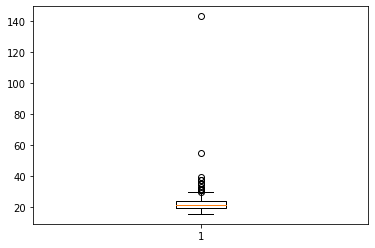

In [10]:
output = plt.boxplot(w_df.BMI)

In [11]:
for item in output['whiskers']:
    print(item.get_ydata())

[19.59183673 15.49586777]
[23.67125363 29.51059167]


In [12]:
ep_df = w_df[w_df.BMI>29.5]
ep_df

,BMI,Health
37,29.510592,3.0
42,31.141869,2.0
151,30.864198,4.0
156,30.961729,3.0
292,35.444234,3.0
357,29.961612,3.0
401,31.141869,2.0
612,37.182261,2.0
636,31.804658,3.0
676,143.080125,3.0


In [13]:
for i,r in ep_df.iterrows():
    w_df.at[i,'BMI'] = np.nan

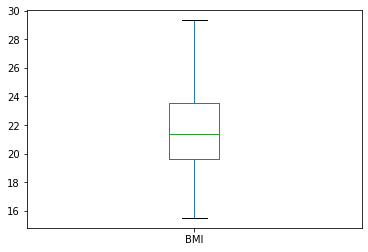

In [14]:
w_df.BMI.plot(kind='box')

In [15]:
w_df = w_df.fillna(w_df.median())

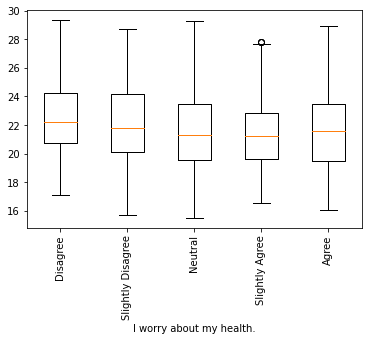

In [16]:
PossibleHealthy = w_df['Health'].unique()
PossibleHealthy.sort()
SS = pd.Series('', index = PossibleHealthy)
XLabels = ['Disagree','Slightly Disagree','Neutral','Slightly Agree','Agree']

for hs in PossibleHealthy:
    BM = w_df['Health'] == hs
    SS[hs] = w_df[BM].BMI

plt.boxplot(SS)
plt.xticks(range(1,6),XLabels, rotation=90)
plt.xlabel(att_df.at['Health','original'])

plt.show()

### Two dimensional outlier detection (Both categorical)
Find the outliers in the respondants based on the two columns: Medicine, Biology.

In [17]:
pd.crosstab(response_df['Medicine'],response_df['Biology'])

Biology,1.0,2.0,3.0,4.0,5.0
Medicine,,,,,
1.0,183,81,33,7,3
2.0,46,112,61,18,12
3.0,16,69,72,41,18
4.0,3,8,19,27,28
5.0,2,4,11,29,96


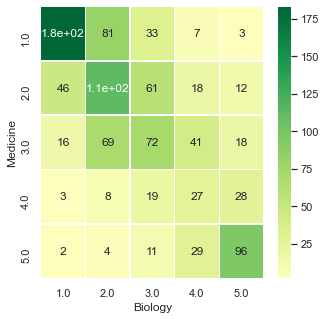

In [18]:
import seaborn as sns; sns.set()
data = pd.crosstab(response_df['Medicine'],response_df['Biology'])

plt.figure(figsize=(5,5))

sns.heatmap(data, linewidths=.5, annot=True, center=0 ,cmap="RdYlGn")
plt.show()

### Multi Dimensional Outlier Detection

See if there are any outliers based on respondants their spending habits:

SPENDING HABITS
- I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- I enjoy going to large shopping centres.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- I prefer branded clothing to non branded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- I spend a lot of money on my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)


Use K-means clustering to cluster them in 23 groups, and based on the output of the clustering decide if there are any outliers.

In [38]:
spending_df = response_df[['Finances','Shopping centres','Branded clothing','Entertainment spending','Spending on looks','Spending on gadgets','Spending on healthy eating']]
spending_df.describe()

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
count,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000
mean,3.023833,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754
std,1.144365,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [39]:
spending_df=spending_df.fillna(spending_df.median())
spending_df.describe()

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,3.023762,3.233663,3.050495,3.200990,3.105941,2.870297,3.558416
std,1.142663,1.321791,1.305028,1.187229,1.203589,1.284970,1.092842
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=23).fit(spending_df)

# Cluster membership
Cluster_members = pd.Series(kmeans.labels_, index=spending_df.index)
Cluster_members

0        7
1        3
2        3
3       12
4        2
        ..
1005    19
1006    11
1007     2
1008     3
1009     5
Length: 1010, dtype: int32

In [41]:
Cluster_members.value_counts()

15    94
9     67
4     66
2     61
13    52
10    51
19    50
1     49
7     47
20    47
21    47
18    40
12    40
0     36
11    35
8     34
5     32
3     32
16    30
14    28
22    27
17    26
6     19
dtype: int64

In [42]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(spending_df)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard deviation,1.9806,1.2769,1.1814,1.0323,0.9797,0.9248,0.7935
Proportion of variance,0.3751,0.1559,0.1334,0.1019,0.0918,0.0818,0.0602
Cumulative proportion,0.3751,0.5309,0.6644,0.7663,0.8580,0.9398,1.0000


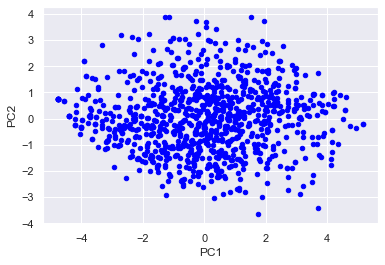

In [43]:
scores = pd.DataFrame(pcs.fit_transform(spending_df),
                      columns=[f'PC{i}' for i in range(1, 8)])

scores.plot.scatter(x='PC1', y='PC2',c='blue')
plt.show()

There are no outliers in the data based on their spending habits.